In [2]:
from sklearn.utils import shuffle

from functions_utils import compounds, file_splitter, load_output

from regression_function import regression_alpha,regression_test

import os

import numpy as np

import matplotlib.pyplot as plt

In [4]:
'''Importing predicted molecules and energies'''
x_predicted_molecules= np.array([mol.representation for mol in compounds("predicted_splitted_data")])
print(x_predicted_molecules.shape)
y_predicted_energies=np.load("energies_from_predicted.npy")
print(y_predicted_energies.shape)

(8000, 78)
(8000,)


In [5]:
'''Importing original trajectories and energies'''
x_original= np.array([mol.representation for mol in compounds("splitted_data")])
y_original=load_output("xyz_files/energies_benzene.xyz")
y_original=np.array(y_original)

In [ ]:
'''Change the path name below for the benchmarking datset'''

In [6]:
'''Importing MD dataset and their enrgies'''
directory="test_data_II/further_data_for_bsc_thesis/"

'''!!!TO RUN ONLY ONCE!!! when there is no files in MD_splitted'''   
file_splitter(directory+"MD/trajectory1.xyz","MD_splitted")

md_molecules= np.array([mol.representation for mol in compounds("MD_splitted/")])

md_energies=load_output("test_data_II/further_data_for_bsc_thesis/MD/properties/trajectory1/es_energies/ZINDO_verytight.dat")
md_energies=np.array(md_energies)

In [7]:
'''Importing DFTB dataset and their enrgies'''
directory="test_data_II/further_data_for_bsc_thesis/"

'''!!!TO RUN ONLY ONCE!!! when there is no files in DFTB_splitted''' 
file_splitter(directory+"DFTB/trajectory1.xyz","DFTB_splitted")

dftb_molecules=np.array([mol.representation for mol in compounds("DFTB_splitted")])

dftb_energies=load_output("test_data_II/further_data_for_bsc_thesis/DFTB/properties/trajectory1/es_energies/ZINDO_verytight.dat")
dftb_energies=np.array(dftb_energies)

# Predicted trajectory as Training Set

Predicted energy(7k) and predicted test(1K)

In [68]:
x_test=x_predicted_molecules[-1000:]
y_test=y_predicted_energies[-1000:]

y_test_float=y_test.astype(np.float64)

In [69]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_predicted_molecules[:i]
    y_train=y_predicted_energies[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)
print("Minimum is",min(mae_lst))
print("Maximum is",max(mae_lst))

[0.24527241701376448, 0.1869597521604196, 0.16352412861146426, 0.15226904036077138, 0.1361128324447417, 0.13119963071312452, 0.11876319283634514, 0.10830153893897153, 0.10233808097304459, 0.08803414011755228, 0.07705654004047446, 0.06906505831095001, 0.06441321585576179]
Minimum is 0.06441321585576179
Maximum is 0.24527241701376448


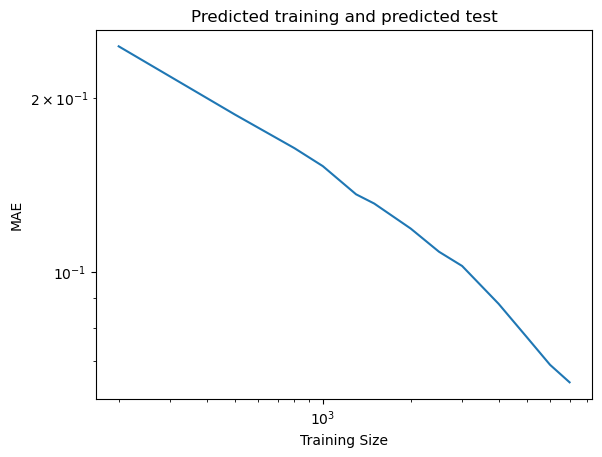

In [70]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and predicted test")
plt.show()

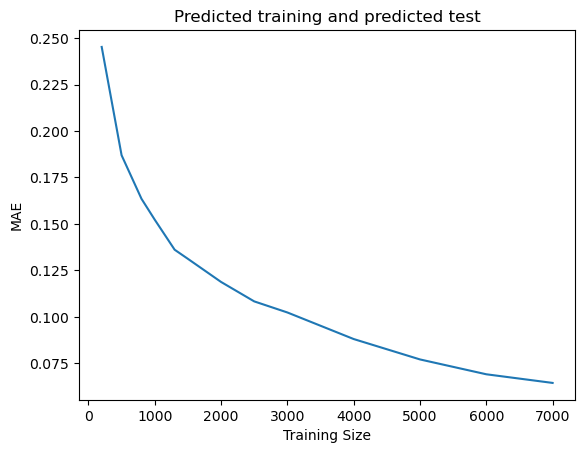

In [71]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and predicted test")
plt.show()

Predicted energy(8k) and DFTB test(1k beginning)

In [101]:
x_test=dftb_molecules[:1000]
y_test=dftb_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [102]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_predicted_molecules[:i]
    y_train=y_predicted_energies[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[2.038789152763401, 1.8198304190918388, 1.7563894935795386, 1.693680233903809, 1.6616082700314736, 1.6580322464724355, 1.5644707932168402, 1.5432778185582587, 1.513167986113187, 1.4478100678351358, 1.3578104919146312, 1.3351936425688733, 1.2970857370297468, 1.278357175973874]


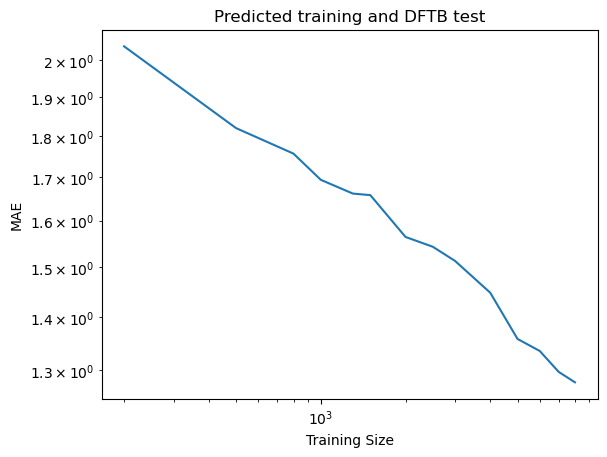

In [103]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and DFTB test")
plt.show()

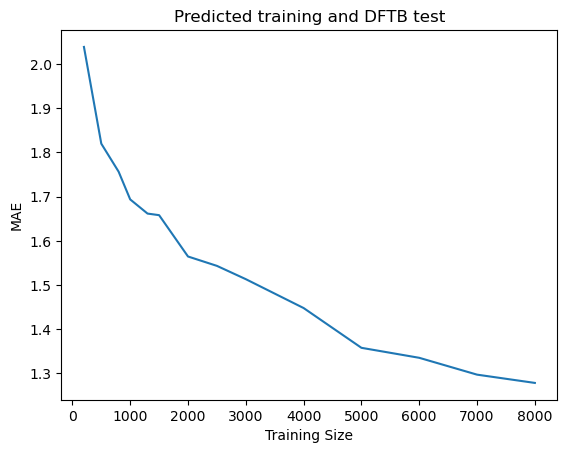

In [104]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and DFTB test")
plt.show()

Predicted energy(8k) and MD test(1k beginning)

In [105]:
x_test=md_molecules[:1000]
y_test=md_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [106]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_predicted_molecules[:i]
    y_train=y_predicted_energies[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.8258648396618741, 0.6728552074030918, 0.6543378405836685, 0.6236508450844627, 0.5868893337255608, 0.5848122347518536, 0.49346562540033123, 0.4638943300935618, 0.41871070741871996, 0.4191090083149153, 0.3737475009864586, 0.3674260967382667, 0.34322718483159287, 0.3336207373148971]


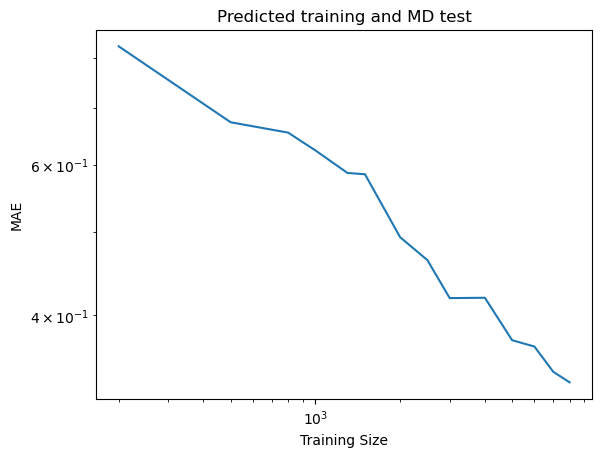

In [107]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and MD test")
plt.show()

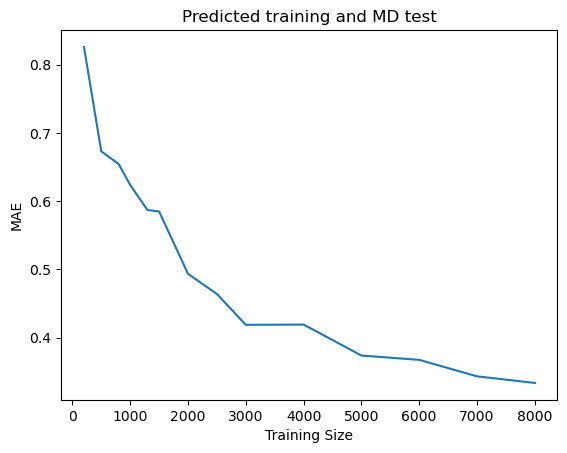

In [108]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Predicted training and MD test")
plt.show()

# Original trajectory as Training Set

Original trajectory(8K) and DFTB test(1K)

In [109]:
x_test=dftb_molecules[:1000]
y_test=dftb_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [110]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_original[:i]
    y_train=y_original[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.87778245496219, 0.3580247736068301, 0.3096619389155022, 0.305379499222751, 0.3563181634181083, 0.37321622787052217, 0.5054768240863539, 0.5364175056444347, 0.6010686458761355, 0.6326988314920539, 0.6611741450062615, 0.7044638778135787, 0.7194402985551495, 0.7482305261920976]


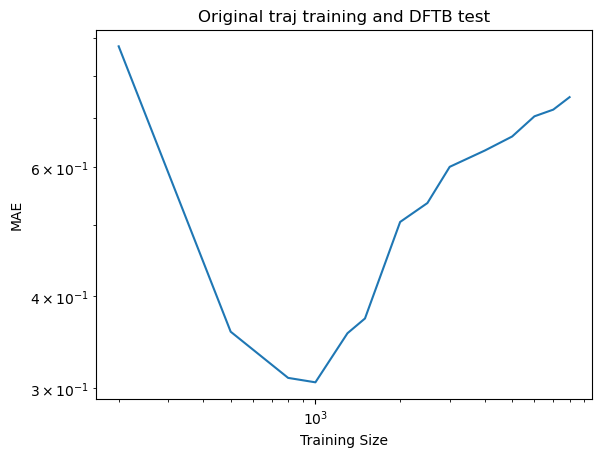

In [111]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Original traj training and DFTB test")
plt.show()

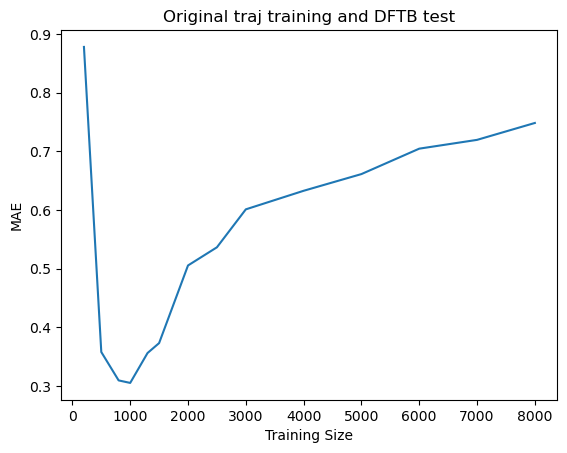

In [112]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Original traj training and DFTB test")
plt.show()

Original trajectory(8k) and MD test(1k)

In [113]:
x_test=md_molecules[:1000]
y_test=md_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [114]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_original[:i]
    y_train=y_original[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.5307496173963554, 0.6258481645280051, 0.6809542664309439, 0.7007498172299156, 0.7334900884342649, 0.7357701996565156, 0.7501789453473855, 0.760357711399432, 0.7684700489509484, 0.780506535530242, 0.7874939881401294, 0.7926241281794002, 0.795560390759648, 0.7983377681435267]


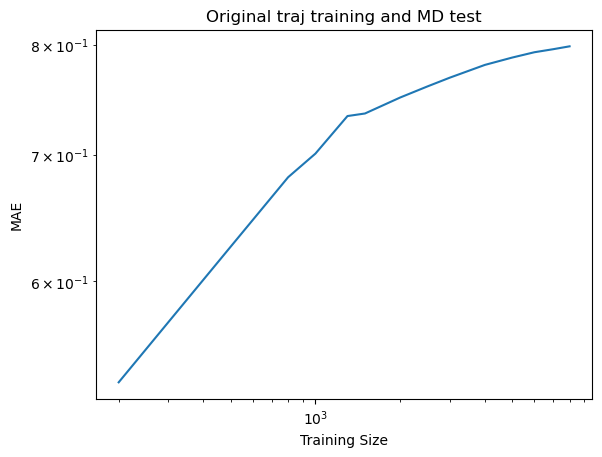

In [115]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Original traj training and MD test")
plt.show()

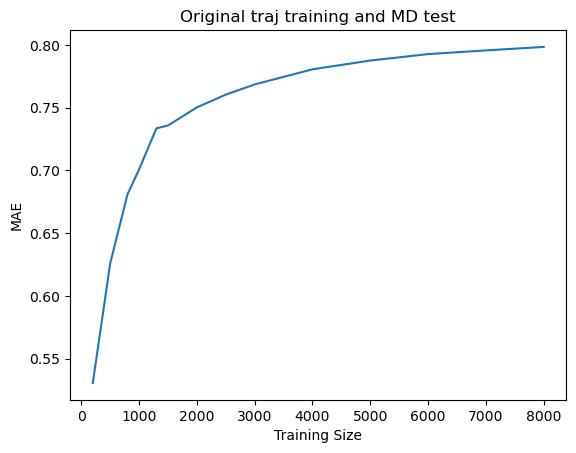

In [116]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Original traj training and MD test")
plt.show()

# Combination of original and predicted as training set

In [9]:
x_concatenate=np.concatenate((x_original[:5000],x_predicted_molecules[:5000]))
y_concatenate=np.concatenate((y_original[:5000],y_predicted_energies[:5000]))

Combination training(10k) and DFTB molecules(1K)

In [182]:
x_test=dftb_molecules[:1000]
y_test=dftb_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [183]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000,10000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_concatenate[:i]
    y_train=y_concatenate[:i]
    #shuffling the training data
    y_train_float=y_train.astype(np.float64)
    alpha=regression_alpha(x_train,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_train,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.8777824549621898, 0.3580247736068297, 0.30966193891550214, 0.30537949922275137, 0.3563181634181076, 0.3732162278705224, 0.5054768240863581, 0.5364175056444382, 0.6010686458761381, 0.6326988314920537, 0.661174145006264, 0.5874108601798469, 0.5808179076030331, 0.5707139823425643, 0.5534121737626345]


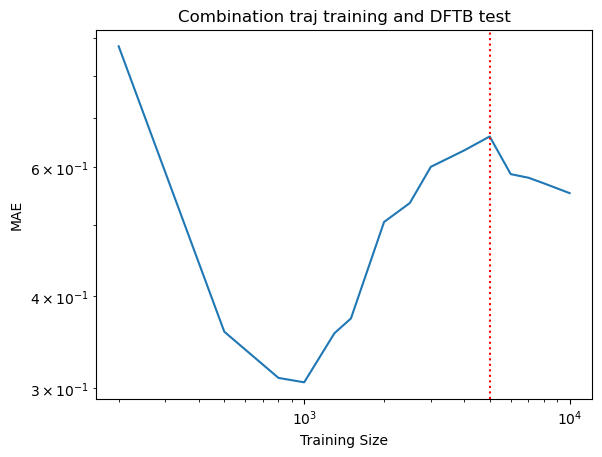

In [184]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.axvline(x = 5000,  color='red', linestyle="dotted")
plt.ylabel("MAE")
plt.title("Combination traj training and DFTB test")
plt.show()

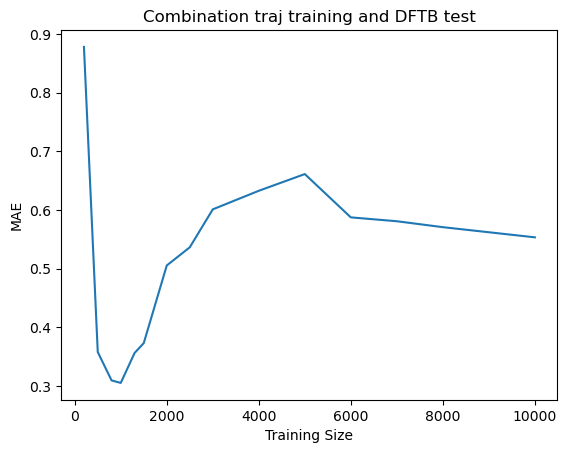

In [185]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Combination traj training and DFTB test")
plt.show()

Combination training(10K) and MD molecules(1K)

In [186]:
x_test=md_molecules[:1000]
y_test=md_energies[:1000]
mydict = {9: ''}
y_test=np.array([i[i.find('\t'):].translate(mydict) for i in y_test])
y_test_float=y_test.astype(np.float64)

In [187]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000,10000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_concatenate[:i]
    y_train=y_concatenate[:i]
    #shuffling the training data
    y_train_float=y_train.astype(np.float64)
    alpha=regression_alpha(x_train,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_train,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.5307496173963545, 0.6258481645280063, 0.6809542664309421, 0.7007498172299147, 0.7334900884342638, 0.7357701996565168, 0.7501789453473862, 0.7603577113994322, 0.7684700489509465, 0.78050653553024, 0.7874939881401245, 0.6931764858466601, 0.6890071028886248, 0.6830718922213262, 0.6722925843403855]


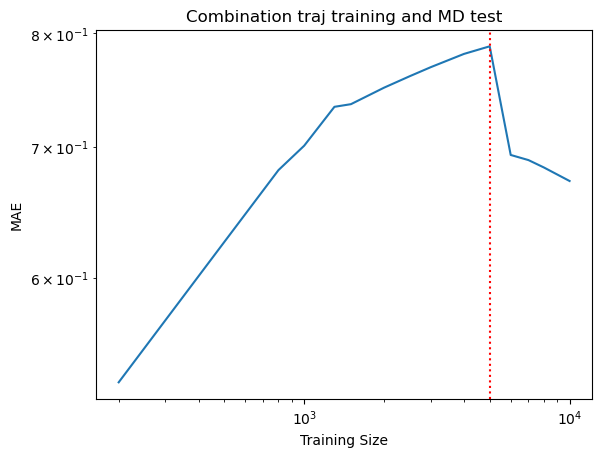

In [188]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.axvline(x = 5000,  color='red', linestyle="dotted")
plt.ylabel("MAE")
plt.title("Combination traj training and MD test")
plt.show()

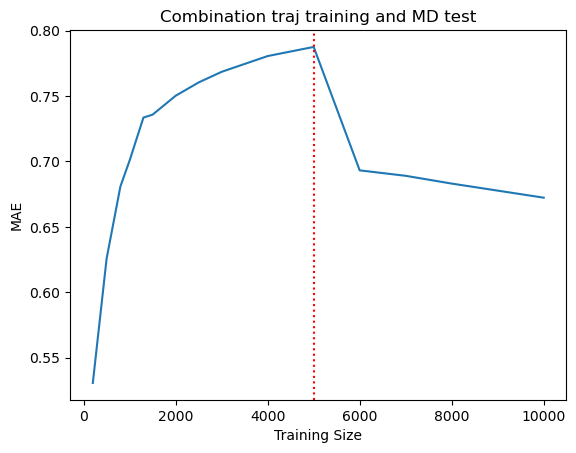

In [189]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.axvline(x = 5000, color='red', linestyle="dotted")
plt.title("Combination traj training and MD test")
plt.show()

Combination of traj(9k) and combination train(1k)

In [10]:
x_shuffle,y_shuffle=shuffle(x_concatenate,y_concatenate)
x_test=x_shuffle[-1000:]
y_test=y_shuffle[-1000:]

y_test_float=y_test.astype(np.float64)

In [11]:
training_size=[200,500,800,1000,1300,1500,2000,2500,3000,4000,5000,6000,7000,8000,9000]
mae_lst=[]

for i in training_size:
    #Assigning first i data as training data
    x_train=x_concatenate[:i]
    y_train=y_concatenate[:i]
    #shuffling the training data
    x_shuffle,y_shuffle=shuffle(x_train,y_train)
    y_train_float=y_shuffle.astype(np.float64)
    alpha=regression_alpha(x_shuffle,y_train_float,62)
    y_predicted=np.dot(regression_test(x_test,x_shuffle,62),alpha)
    mae=(np.mean(np.abs(y_test_float-y_predicted)))
    mae_lst.append(mae)
print(mae_lst)

[0.622234613818455, 0.5320239496491177, 0.499777662961665, 0.480347322794252, 0.46589129450928124, 0.46196910896933807, 0.44468835363330955, 0.43696745106137924, 0.4317082339429397, 0.42917108358802897, 0.42497129216101726, 0.059803973818156254, 0.03589803369725779, 0.02272740324096539, 0.008674950804768825]


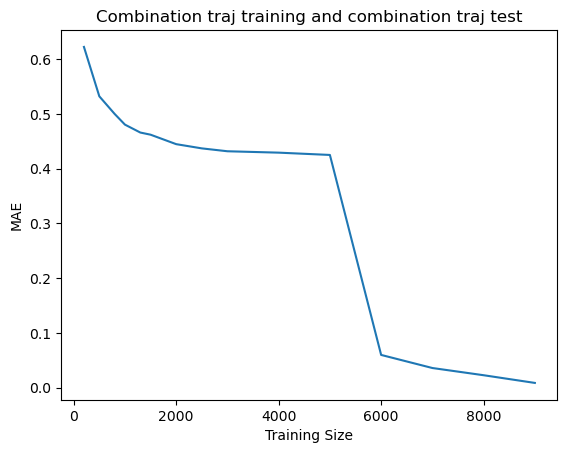

In [12]:
plt.plot(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Combination traj training and combination traj test")
plt.show()

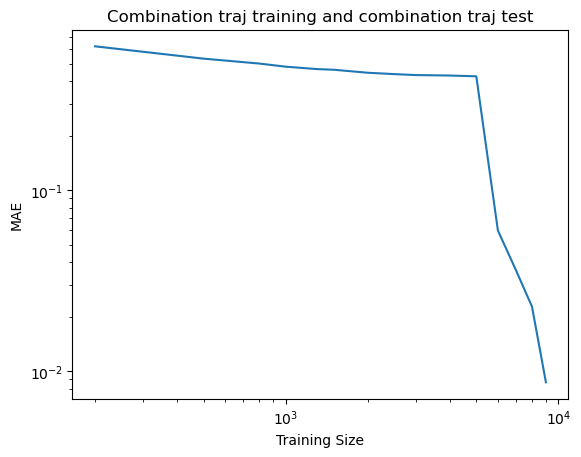

In [13]:
plt.loglog(training_size,mae_lst)
plt.xlabel("Training Size")
plt.ylabel("MAE")
plt.title("Combination traj training and combination traj test")
plt.show()